In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

## Load the data and apply preprocessing

In [7]:
# load the datasets
sch_stat_df = pd.read_excel('Datasets/scottish_schools_stats.xlsx')
sch_info_df = pd.read_excel('Datasets/scottish_schools_contact.xlsx', sheet_name='Open Schools')
dep_df = pd.read_excel('Datasets/postcode_deprivation.xlsx')

In [40]:
sch_stat_df.head()

,Local Authority,SeedCode,School Name,School Type,Total pupils
0,Aberdeen City,1002929,Brimmond School,Primary,425
1,Aberdeen City,1004247,Countesswells School,Primary,110
2,Aberdeen City,5230420,Riverbank School,Primary,332
3,Aberdeen City,5230624,Westpark School,Primary,242
4,Aberdeen City,5230829,Heathryburn School,Primary,306


In [9]:
sch_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Local Authority  2461 non-null   object
 1   SeedCode         2461 non-null   int64 
 2   School Name      2461 non-null   object
 3   School Type      2461 non-null   object
 4   Total pupils     2461 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 96.3+ KB


In [10]:
sch_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Seed Code                                2458 non-null   int64 
 1   LA Name                                  2458 non-null   object
 2   Centre Type                              2458 non-null   object
 3   School Name                              2458 non-null   object
 4   Address Line1                            2458 non-null   object
 5   Address Line2                            2457 non-null   object
 6   Address Line3                            2458 non-null   object
 7   Post Code                                2458 non-null   object
 8   Unique Property Reference Number (UPRN)  2458 non-null   int64 
 9   Email                                    2458 non-null   object
 10  Phone Number                             2458 non-null   obj

We only need to add Post Codes from contact dataframe to the stats dataframe

In [ ]:
sch_info = sch_info_df.rename(columns={'Seed Code' : 'SeedCode'})

In [46]:
sch_df = sch_info.merge(sch_stat_df, on='SeedCode', how='left')

In [47]:
sch_df.head()

,SeedCode,LA Name,Centre Type,School Name_x,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,...,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,Local Authority,School Name_y,School Type,Total pupils
0,1002929,Aberdeen City,Local Authority,Brimmond School,Netherhills Place,Bucksburn,ABERDEEN,AB21 9DF,9051145398,brimmondschool@aberdeencity.gov.uk,...,Yes,No,No,No,Yes,Non-denominational,Aberdeen City,Brimmond School,Primary,425.0
1,1004140,Aberdeen City,Local Authority,Orchard Brae School,Howes Road,0,ABERDEEN,AB16 7RH,9051129833,OrchardBraeSchool@aberdeencity.gov.uk,...,No,No,Yes,No,No,Non-denominational,Aberdeen City,Orchard Brae School,Special,129.0
2,1004166,Aberdeen City,Local Authority,Lochside Academy,Wellington Circle,Altens,ABERDEEN,AB12 3JG,9051148374,nehendry@aberdeencity.gov.uk,...,No,Yes,No,No,No,Non-denominational,Aberdeen City,Lochside Academy,Secondary,1138.0
3,1004247,Aberdeen City,Local Authority,Countesswells School,Airyhall School,Countesswells Road,ABERDEEN,AB15 8AD,9051018828,CountesswellsSchool@aberdeencity.gov.uk,...,Yes,No,No,No,No,Non-denominational,Aberdeen City,Countesswells School,Primary,110.0
4,5230420,Aberdeen City,Local Authority,Riverbank School,Dill Road,Tillydrone,ABERDEEN,AB24 2XL,9051054562,riverbank@aberdeencity.gov.uk,...,Yes,No,No,No,Yes,Non-denominational,Aberdeen City,Riverbank School,Primary,332.0


In [48]:
sch_df.columns

Index(['SeedCode', 'LA Name', 'Centre Type', 'School Name_x', 'Address Line1',
       'Address Line2', 'Address Line3', 'Post Code',
       'Unique Property Reference Number (UPRN)', 'Email', 'Phone Number',
       'Website Address', 'Pre-school Department', 'Primary Department',
       'Secondary Department', 'Special Department', 'Gaelic Unit',
       'Integrated Special Unit', 'Denomination', 'Local Authority',
       'School Name_y', 'School Type', 'Total pupils'],
      dtype='object')

In [49]:
columns_to_remove = ['School Name_y', 'Centre Type', 'Address Line1',
       'Address Line2', 'Address Line3', 'Unique Property Reference Number (UPRN)', 'Email', 'Phone Number',
       'Website Address', 'Pre-school Department', 'Primary Department',
       'Secondary Department', 'Special Department', 'Gaelic Unit',
       'Integrated Special Unit', 'Denomination', 'Local Authority']


sch_df.drop(columns=columns_to_remove, inplace=True)
sch_df = sch_df.rename(columns={'School Name_x' : 'School Name'})
sch_df = sch_df.rename(columns={'LA Name' : 'Local Authority'})

In [50]:
sch_df.head()

,SeedCode,Local Authority,School Name,Post Code,School Type,Total pupils
0,1002929,Aberdeen City,Brimmond School,AB21 9DF,Primary,425.0
1,1004140,Aberdeen City,Orchard Brae School,AB16 7RH,Special,129.0
2,1004166,Aberdeen City,Lochside Academy,AB12 3JG,Secondary,1138.0
3,1004247,Aberdeen City,Countesswells School,AB15 8AD,Primary,110.0
4,5230420,Aberdeen City,Riverbank School,AB24 2XL,Primary,332.0


In [28]:
# create a function to return the deprivation value
def get_dep(pos):
    try:
        dep_value = dep_df[dep_df['Postcode'] == pos]['SIMD2020v2_Quintile'].values[0]
        return dep_value
    
    except:
        return None

In [51]:
# Add the deprivaion quintile value for each school
sch_df['Deprivation Quintile'] = list(map(get_dep, sch_df['Post Code']))

In [56]:
sch_df[sch_df['School Type'].isnull()]

,SeedCode,Local Authority,School Name,Post Code,School Type,Total pupils,Deprivation Quintile
32,5240042,Aberdeen City,Virtual School,AB10 1AB,NaN,NaN,3.0
54,5245842,Aberdeen City,Hospital & Home Tuition Service,AB25 2ZG,NaN,NaN,4.0
378,5700248,Clackmannanshire,Primary School Support Service,FK10 2SD,NaN,NaN,1.0
404,1004840,Dumfries & Galloway,D&G Primary Central & East Inclusion Hub,DG2 0DY,NaN,NaN,3.0
405,1004859,Dumfries & Galloway,D&G Primary West Inclusion Hub,DG8 6PE,NaN,NaN,2.0
483,5940842,Dumfries & Galloway,D&G Secondary Inclusion Support,DG2 9AW,NaN,NaN,1.0
614,1003062,East Dunbartonshire,East Dunbartonshire Central School,G66 1NH,NaN,NaN,1.0
643,8338744,East Dunbartonshire,Secondary Wellbeing,G66 1XD,NaN,NaN,1.0
662,1005685,East Lothian,Craighall Primary School,EH21 6UL,NaN,NaN,4.0
663,1005693,East Lothian,Blindwells Primary School,EH32 0BX,NaN,NaN,3.0


In [63]:
sch_df = sch_df.dropna()

## Visualisation

In [88]:
sch_df.groupby('School Type').sum()['Total pupils'].values

array([383331., 302253.,   7145.])

In [87]:
list(sch_df.groupby('School Type').sum().index)

['Primary', 'Secondary', 'Special']

In [121]:
sch_df.groupby('School Type').mean(numeric_only=True)['Deprivation Quintile']

School Type
Primary      2.862278
Secondary    3.205128
Special      2.276190
Name: Deprivation Quintile, dtype: float64

In [90]:
sch_df.groupby('School Type').count()['School Name']

School Type
Primary      1975
Secondary     351
Special       105
Name: School Name, dtype: int64

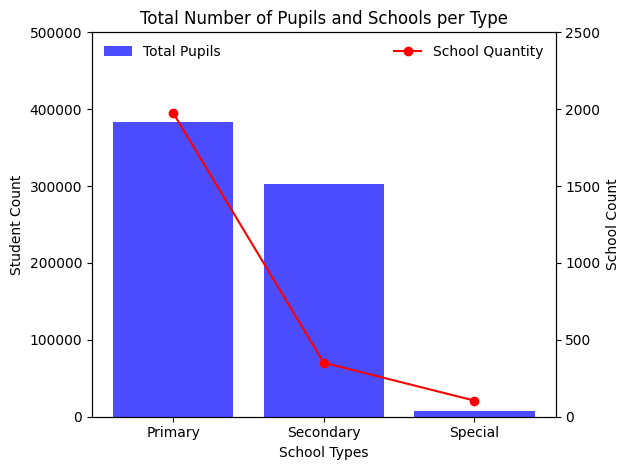

In [97]:
# Sample data for student count and school count for three different school types
school_types = list(sch_df.groupby('School Type').sum().index)
pupils_count = sch_df.groupby('School Type').sum()['Total pupils'].values
school_count = sch_df.groupby('School Type').count()['School Name'].values

# Create a figure and axis
fig, ax1 = plt.subplots()

# Create the bar chart for student count
ax1.bar(school_types, pupils_count, color='b', alpha=0.7, label='Total Pupils')
ax1.set_xlabel('School Types')
ax1.set_ylabel('Student Count')
ax1.set_ylim(0,500000)
ax1.tick_params(axis='y')

# Create a second y-axis on the right for school count
ax2 = ax1.twinx()
ax2.plot(school_types, school_count, color='r', marker='o', label='School Quantity')
ax2.set_ylabel('School Count')
ax2.set_ylim(0,2500)
ax2.tick_params(axis='y')

# Add legends
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

# Set a title
plt.title('Total Number of Pupils and Schools per Type')

# Show the plot
plt.tight_layout()
plt.show()

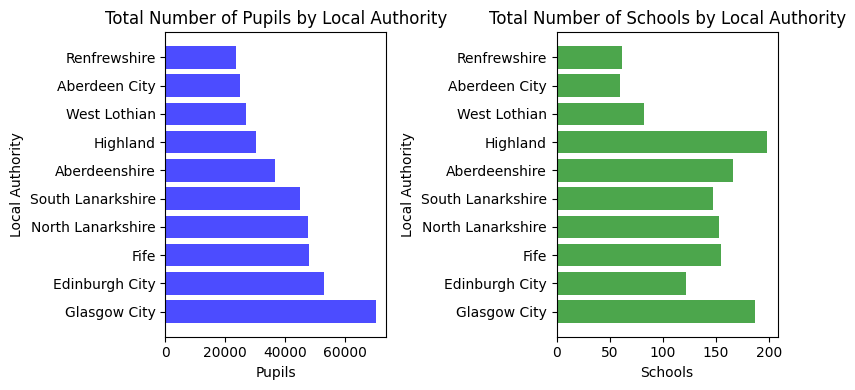

In [118]:
# Sample data (replace with your actual data)
data = {
    'LocalAuthority': list(sch_df.groupby('Local Authority').count().index),
    'Schools': sch_df.groupby('Local Authority').count()['School Name'],
    'Pupils': sch_df.groupby('Local Authority').sum()['Total pupils'],
}

df = pd.DataFrame(data)
df = df.sort_values(by=['Pupils'], ascending=False)[:10]
# Set the figure size
plt.figure(figsize=(8, 4))

# Create a subplot with 1 row and 2 columns for side-by-side bar charts
plt.subplot(1, 2, 1)

# Create horizontal bar chart for the total number of pupils
plt.barh(df['LocalAuthority'], df['Pupils'], color='b', alpha=0.7)
plt.xlabel('Pupils')
plt.ylabel('Local Authority')
plt.title('Total Number of Pupils by Local Authority')


# Create a subplot for the second bar chart
plt.subplot(1, 2, 2)

# Create horizontal bar chart for the total number of students
plt.barh(df['LocalAuthority'], df['Schools'], color='g', alpha=0.7)
plt.xlabel('Schools')
plt.ylabel('Local Authority')
plt.title('Total Number of Schools by Local Authority')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [126]:
sch_df.groupby('Local Authority').mean(numeric_only=True)

,SeedCode,Total pupils,Deprivation Quintile
Local Authority,,,
Aberdeen City,4.957597e+06,414.033333,3.450000
Aberdeenshire,5.180133e+06,221.060241,3.686747
Angus,5.308135e+06,245.857143,3.250000
Argyll & Bute,8.056521e+06,111.863636,2.943182
Clackmannanshire,5.498166e+06,289.826087,2.130435
Dumfries & Galloway,5.798818e+06,162.298246,2.964912
Dundee City,5.010064e+06,408.512195,2.048780
East Ayrshire,7.549515e+06,304.490566,2.471698
East Dunbartonshire,7.654188e+06,404.767442,3.813953


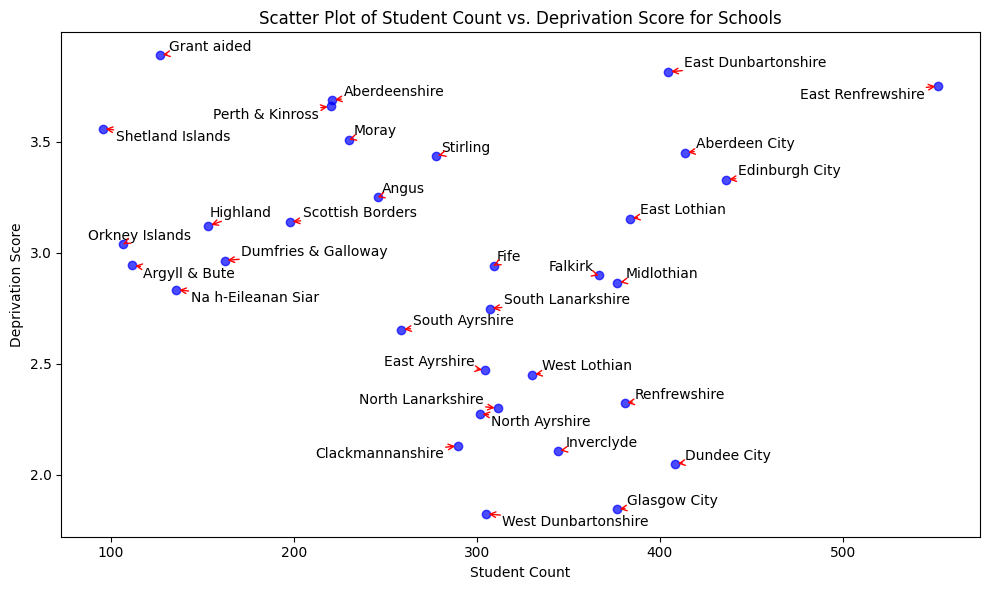

In [134]:
from adjustText import adjust_text  # You may need to install this library

# Sample data (replace with your actual data)
data = {
    'LocalAuthority': sch_df.groupby('Local Authority').mean(numeric_only=True).index,
    'Pupils': sch_df.groupby('Local Authority').mean(numeric_only=True)['Total pupils'],
    'DeprivationScore': sch_df.groupby('Local Authority').mean(numeric_only=True)['Deprivation Quintile'],
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Pupils'], df['DeprivationScore'], label='LocalAuthority', c='b', alpha=0.7)

# Set labels and title
plt.xlabel('Student Count')
plt.ylabel('Deprivation Score')
plt.title('Scatter Plot of Student Count vs. Deprivation Score for Schools')


# Annotate and adjust labels to prevent overlap
texts = [plt.text(row['Pupils'], row['DeprivationScore'], row['LocalAuthority'], fontsize=10) for _, row in df.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'), force_text=0.1, expand_points=(1.2, 1.2))


# Show the plot
plt.tight_layout()
plt.show()
